# Visualizing COVID-19 hospitalizations in the US with *choromap*

**Javier Orman**  
GitHub repository for this notebook: https://github.com/javierorman/choromap/tree/master/covid19_us   
LinkedIn: https://www.linkedin.com/in/javierorman/

Latest update: 9/12/2020

## 1. Introduction
In this notebook I showcase the use of the module **choromap**, which produces **animated choropleth maps**, to visualize the spread of COVID-19 in the United States. Data will be retrieved from the API of *The COVID Tracking Project at The Atlantic* and merged with US Census population data to calculate **hospitalization rates** for each state.

### Import dependencies

Data will be imported and organized with *pandas*. *Geopandas* will be used to work with geospatial data and visualizations will be made with *matplotlib*.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

import requests

import os
import sys

from matplotlib import colors
from matplotlib import pyplot as plt

Set *module_path* for the directory containing the module *choromap*

In [2]:
from pathlib import Path

module_path = str(Path.cwd().parent)

if module_path not in sys.path:
    sys.path.append(module_path)

Next, import classes *ChoroMapBuilder* and *DataFramePrepper* from module *choromap*. The module is [available on GitHub](https://github.com/javierorman/choromap).

In [3]:
from choromap import ChoroMapBuilder, DataFramePrepper

## 2. COVID-19 data for each State

The data used here is available from the API of *The COVID Tracking Project at The Atlantic"*. More information [here](https://covidtracking.com/data/api).

In [4]:
us_covid_df = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')
us_covid_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200911,AK,7024.0,387562.0,NaN,44.0,NaN,NaN,NaN,7.0,NaN,2359.0,A,9/11/2020 03:59,2020-09-11T03:59:00Z,09/10 23:59,43.0,NaN,2020-09-11T03:59:00Z,394586.0,6340.0,387966.0,7024.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,109,1400,394586,posNeg,394586.0,1509,394586,1,0,7362921fa69c20bc82d18bd257382ca0197025c1,0,0,0,0,0,NaN
1,20200911,AL,136703.0,874219.0,NaN,811.0,15527.0,NaN,1593.0,NaN,877.0,54223.0,B,9/11/2020 11:00,2020-09-11T11:00:00Z,09/11 07:00,2333.0,15527.0,2020-09-11T11:00:00Z,998316.0,NaN,NaN,124097.0,2204.0,129.0,NaN,NaN,NaN,NaN,NaN,55157.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1138,4046,1010922,posNeg,1010922.0,5184,1010922,32,188,49b386097fd3df379e87d6c0cf9d84d574230b36,0,0,0,0,0,NaN
2,20200911,AR,68983.0,729375.0,NaN,392.0,4678.0,NaN,NaN,76.0,597.0,61245.0,A,9/11/2020 14:35,2020-09-11T14:35:00Z,09/11 10:35,953.0,4678.0,2020-09-11T14:35:00Z,796179.0,NaN,729375.0,67911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17549.0,2709.0,5,1180,0,798358,posNeg,798358.0,1180,798358,13,72,2fee4a33919d59c199473a27dcdfab3551c0b182,0,0,0,0,0,NaN
3,20200911,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,9/1/2020 00:00,2020-09-01T00:00:00Z,08/31 20:00,0.0,NaN,2020-09-01T00:00:00Z,1571.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1571,posNeg,1571.0,0,1571,0,0,af92759401b47f8c1b3777fde5b06c65b773a25a,0,0,0,0,0,NaN
4,20200911,AZ,207523.0,1071901.0,NaN,577.0,21747.0,171.0,NaN,100.0,NaN,32472.0,A+,9/11/2020 00:00,2020-09-11T00:00:00Z,09/10 20:00,5288.0,21747.0,2020-09-11T00:00:00Z,1277543.0,NaN,NaN,205642.0,5014.0,274.0,NaN,NaN,275536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,521,6169,1279424,posNeg,1279424.0,6690,1279424,15,136,e8b36c0e4297a0b87cb0a21840d7fdb9eb5d17dc,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733,20200124,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,posNeg,0.0,0,0,0,0,6f40087f42d06db4121e09b184785b4110cd4df8,0,0,0,0,0,NaN
10734,20200123,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,0,0,0,totalTestsViral,2.0,1,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
10735,20200123,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,posNeg,0.0,0,0,0,0,978c05d8a7a9d46e9fa826d83215f5b9732f2c6d,0,0,0,0,0,NaN
10736,20200122,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,0,0,0,totalTestsViral,1.0,0,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


Here are the variables available in the data:

In [5]:
us_covid_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'death

Next we change the format of the dates from *yyyymmdd* to *yyyy-mm-dd*.

In [6]:
def to_iso(date):
    """
    Convert a date (str) from yyyymmdd to yyyy-mm-dd,
    e.g. 20200128 -> 2020-01-28
    """
    x = str(date)
    return x[0:4] + '-' + x[4:6] + '-' + x[6:8]

In [7]:
us_covid_df['date'] = us_covid_df['date'].apply(lambda x: to_iso(x))

In [8]:
# First 5 rows
us_covid_df.head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-11,AK,7024.0,387562.0,NaN,44.0,NaN,NaN,NaN,7.0,NaN,2359.0,A,9/11/2020 03:59,2020-09-11T03:59:00Z,09/10 23:59,43.0,NaN,2020-09-11T03:59:00Z,394586.0,6340.0,387966.0,7024.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,109,1400,394586,posNeg,394586.0,1509,394586,1,0,7362921fa69c20bc82d18bd257382ca0197025c1,0,0,0,0,0,NaN
1,2020-09-11,AL,136703.0,874219.0,NaN,811.0,15527.0,NaN,1593.0,NaN,877.0,54223.0,B,9/11/2020 11:00,2020-09-11T11:00:00Z,09/11 07:00,2333.0,15527.0,2020-09-11T11:00:00Z,998316.0,NaN,NaN,124097.0,2204.0,129.0,NaN,NaN,NaN,NaN,NaN,55157.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1138,4046,1010922,posNeg,1010922.0,5184,1010922,32,188,49b386097fd3df379e87d6c0cf9d84d574230b36,0,0,0,0,0,NaN
2,2020-09-11,AR,68983.0,729375.0,NaN,392.0,4678.0,NaN,NaN,76.0,597.0,61245.0,A,9/11/2020 14:35,2020-09-11T14:35:00Z,09/11 10:35,953.0,4678.0,2020-09-11T14:35:00Z,796179.0,NaN,729375.0,67911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17549.0,2709.0,5,1180,0,798358,posNeg,798358.0,1180,798358,13,72,2fee4a33919d59c199473a27dcdfab3551c0b182,0,0,0,0,0,NaN
3,2020-09-11,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,9/1/2020 00:00,2020-09-01T00:00:00Z,08/31 20:00,0.0,NaN,2020-09-01T00:00:00Z,1571.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1571,posNeg,1571.0,0,1571,0,0,af92759401b47f8c1b3777fde5b06c65b773a25a,0,0,0,0,0,NaN
4,2020-09-11,AZ,207523.0,1071901.0,NaN,577.0,21747.0,171.0,NaN,100.0,NaN,32472.0,A+,9/11/2020 00:00,2020-09-11T00:00:00Z,09/10 20:00,5288.0,21747.0,2020-09-11T00:00:00Z,1277543.0,NaN,NaN,205642.0,5014.0,274.0,NaN,NaN,275536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,521,6169,1279424,posNeg,1279424.0,6690,1279424,15,136,e8b36c0e4297a0b87cb0a21840d7fdb9eb5d17dc,0,0,0,0,0,NaN


## 3. Population data

Because we are interested in the *rate of hospitalizations* in each state, we need import population data. Here we use a dataset from the US Census, [available here](https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx).

In [9]:
census_df = pd.read_excel('datasets/nst-est2019-01.xlsx')

In [10]:
# Eliminate unnecessary rows and columns
census_df = census_df.iloc[8:59, [0, -1]].reset_index(drop=True)
census_df.columns = ['state_full', 'population']

# First 5 rows
census_df.head()

,state_full,population
0,.Alabama,4903185.0
1,.Alaska,731545.0
2,.Arizona,7278717.0
3,.Arkansas,3017804.0
4,.California,39512223.0


In [11]:
# Eliminate unnecessary characters
census_df['state_full'] = census_df['state_full'].str.replace('.', '')
census_df.head()

,state_full,population
0,Alabama,4903185.0
1,Alaska,731545.0
2,Arizona,7278717.0
3,Arkansas,3017804.0
4,California,39512223.0


https://worldpopulationreview.com/states/state-abbreviations

Because the states in *us_covid_df* are represented by 2-letter codes, we will use [this dataset](https://worldpopulationreview.com/states/state-abbreviations) to properly format *census_df*.

In [12]:
codes_df = pd.read_csv('datasets/codes_data.csv')

In [13]:
codes_df.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [14]:
# Merge census_df and codes_df
pop_df = codes_df.merge(census_df, left_on='State', right_on='state_full', how='inner')

# Eliminate unnecessary columns
pop_df = pop_df.iloc[:, [2, 4]]

# Rename columns
pop_df.columns = ['state', 'population']

# Show the first 5 columns
pop_df.head()

,state,population
0,AL,4903185.0
1,AK,731545.0
2,AZ,7278717.0
3,AR,3017804.0
4,CA,39512223.0


In [15]:
# Merge pop_df and covid_df
us_covid_df = us_covid_df.merge(pop_df, on='state', how='left')
us_covid_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,population
0,2020-09-11,AK,7024.0,387562.0,NaN,44.0,NaN,NaN,NaN,7.0,NaN,2359.0,A,9/11/2020 03:59,2020-09-11T03:59:00Z,09/10 23:59,43.0,NaN,2020-09-11T03:59:00Z,394586.0,6340.0,387966.0,7024.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,109,1400,394586,posNeg,394586.0,1509,394586,1,0,7362921fa69c20bc82d18bd257382ca0197025c1,0,0,0,0,0,NaN,731545.0
1,2020-09-11,AL,136703.0,874219.0,NaN,811.0,15527.0,NaN,1593.0,NaN,877.0,54223.0,B,9/11/2020 11:00,2020-09-11T11:00:00Z,09/11 07:00,2333.0,15527.0,2020-09-11T11:00:00Z,998316.0,NaN,NaN,124097.0,2204.0,129.0,NaN,NaN,NaN,NaN,NaN,55157.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1138,4046,1010922,posNeg,1010922.0,5184,1010922,32,188,49b386097fd3df379e87d6c0cf9d84d574230b36,0,0,0,0,0,NaN,4903185.0
2,2020-09-11,AR,68983.0,729375.0,NaN,392.0,4678.0,NaN,NaN,76.0,597.0,61245.0,A,9/11/2020 14:35,2020-09-11T14:35:00Z,09/11 10:35,953.0,4678.0,2020-09-11T14:35:00Z,796179.0,NaN,729375.0,67911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17549.0,2709.0,5,1180,0,798358,posNeg,798358.0,1180,798358,13,72,2fee4a33919d59c199473a27dcdfab3551c0b182,0,0,0,0,0,NaN,3017804.0
3,2020-09-11,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,9/1/2020 00:00,2020-09-01T00:00:00Z,08/31 20:00,0.0,NaN,2020-09-01T00:00:00Z,1571.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1571,posNeg,1571.0,0,1571,0,0,af92759401b47f8c1b3777fde5b06c65b773a25a,0,0,0,0,0,NaN,NaN
4,2020-09-11,AZ,207523.0,1071901.0,NaN,577.0,21747.0,171.0,NaN,100.0,NaN,32472.0,A+,9/11/2020 00:00,2020-09-11T00:00:00Z,09/10 20:00,5288.0,21747.0,2020-09-11T00:00:00Z,1277543.0,NaN,NaN,205642.0,5014.0,274.0,NaN,NaN,275536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,521,6169,1279424,posNeg,1279424.0,6690,1279424,15,136,e8b36c0e4297a0b87cb0a21840d7fdb9eb5d17dc,0,0,0,0,0,NaN,7278717.0


In [16]:
# Create column 'hosp_curr_100000' with the rate of hospitalizations per 100000 residents in each State.
us_covid_df['hosp_curr_100000'] = (us_covid_df['hospitalizedCurrently'] / us_covid_df['population']) * 100000

## 4. Geographic data

The geospatial shapefiles for drawing the map of the United States are available [here](https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5#). 

In [17]:
filepath = 'shapefiles/states_21basic/states.shp'
us_geom_df = gpd.read_file(filepath)

Take out Alaska and Hawaii to keep a practical view of the map.

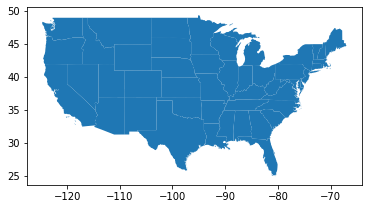

In [18]:
us_geom_df = us_geom_df[us_geom_df['STATE_ABBR'].isin(['AK', 'HI']) == False]
us_geom_df.plot()

## 5. Map

The module *choromap* includes two classes: ChoroMapBuilder, which has the methods necessary to make the maps and DataFramePrepper, which prepares the dataframes to pass to ChoroMapBuilder.

DataFramePrepper takes two parameters: *info_df* and *geom_df*. 
1. *us_covid_df* is our informational DataFrame with dates, locations and values (rate of hospitalizations in this case) and is passed as *info_df*. 
2. *us_geom_df* is our geometric DataFrame with locations and the vector information to draw the shapes of the states. It's passed as *geom_df*.

In [19]:
prepper = DataFramePrepper(info_df=us_covid_df, geom_df=us_geom_df)

In [20]:
# Prepare the informational DataFrame by selecting the columns to focus on. 
# roll_avg being True means that daily values of hospitalizations will be smoothed out through a 7-day window average.
prepper.prep_info_df(category='hosp_curr_100000', col_dates='date', col_location='state', roll_avg=True)

# Prepare geometric DataFrame
prepper.prep_geom_df(location_col='STATE_ABBR', geometry_col='geometry')

# Merged the info_df and geom_df
merged_df = prepper.merge_info_geom()

# Show top 5 rows of merged_df
merged_df.head()

,geometry,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.218857,8.359558,8.473996,8.265757,7.789247,7.770487,7.667306,7.629785,7.384026,7.278969,7.046342,7.263961,7.072607,6.976929,6.843732,6.725542,6.579213,6.828724,6.703030,6.603601,6.472279,6.320321,6.269669,6.087695,5.575540,5.305393,5.117791,4.900172,4.755718,4.690057,4.547480,4.710694,4.765098,4.753842,4.766974,4.731330,4.615017,4.301721,3.960285,3.673253,3.268032,3.037281,2.958488,2.960364,3.232388,3.305552,3.491279,3.628228,3.783938,3.755798,3.731410,3.643237,3.714526,3.648865,3.690137,3.590708,3.530675,3.395602,3.281164,3.221131,3.170479,3.123578,3.037281,2.926596,2.885323,2.930348,2.900332,2.956612,2.990381,3.059793,3.153595,3.191115,3.262404,3.277412,3.219255,3.177983,3.254900,3.247396,3.359957,3.429370,3.551312,3.697641,3.798947,3.812079,3.928392,3.947152,3.949028,3.907756,3.795194,

In [21]:
builder = ChoroMapBuilder(merged_df=merged_df)

Next we build the maps using the ChoroMapBuilder method *make_map*. Here is the documentation on it:

In [22]:
help(ChoroMapBuilder.make_map)

Help on function make_map in module choromap:

make_map(self, title, subtitle, unit, save_name, labels=True, lang='en', video=True, fig_size=(16, 8), color='OrRd', count='all', begin_date=None, norm=<class 'matplotlib.colors.Normalize'>, fps=8)
    It calls for the whole process of creating the maps and turning them into gifs and/or videos.
    
    Parameters:
        title : str
            Title to be displayed above the map
        subtitle : str
            Possible use is to reference the source of the data
        unit : str
            Units for colorbar
        save_name : str
            Name to be used in exports (static map images, gifs, videos) and directory paths
        labels : bool
            If true, the make_static_maps method will insert labels in -hopefully- safe regions of the map
        lang : language code for babel.format_date, passed to pretty_date method
        video : bool
            If true, a video will be created. If left at default False, only a gif 

In [23]:
builder.make_map(title='Rate of current COVID-19 hospitalizations in each state',
                      subtitle='Source: The COVID Tracking Project at The Atlantic', 
                      unit='COVID-19 hospitalizations per 100,000 residents',
                      save_name='hosp_curr_us_100000',
                      count='all', begin_date='2020-03-01',
                      color='Reds', fps=6)